In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import sklearn
print(tf.__version__)

2.3.0


In [2]:
import numpy as np
X1 = np.random.rand(1000).reshape(1000,-1)*100
X2 = np.random.rand(1000).reshape(1000,-1)*20*-1
X = np.c_[X1, X2]
bias = 0.52

y = X1 * 3 + X2/2 + bias + np.random.rand(1000).reshape(1000,-1)

In [3]:
print(X.shape, y.shape)
print(X[:3])

(1000, 2) (1000, 1)
[[ 82.27736455 -17.73278687]
 [ 65.00962649 -10.63885048]
 [ 95.17464114 -16.37394702]]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(len(X_train.shape), len(X_test.shape))

2 2


In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_, reg.rank_, reg.singular_, reg.intercept_)

xt1 = np.linspace(0,100, 50).reshape(50, -1)
xt2 = np.linspace(0,100, 50).reshape(50, -1)

yt = xt1 * reg.coef_[0][0] +  xt2 * reg.coef_[0][1] + reg.intercept_[0]
print(xt1.shape, xt2.shape, yt.shape, reg.score(X_test, y_test))

[[2.99959343 0.49955207]] 2 [740.81222497 150.71664363] [1.04334557]
(50, 1) (50, 1) (50, 1) 0.9999886481079565


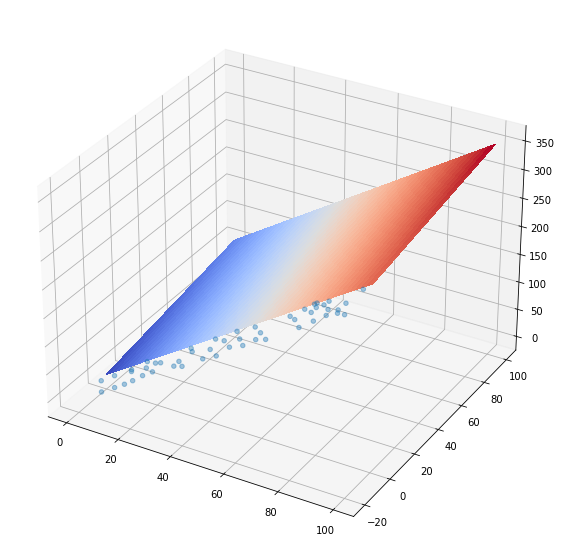

In [6]:
from matplotlib import pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

xt1, xt2 = np.meshgrid(xt1, xt2)
yt = xt1 * reg.coef_[0][0] +  xt2 * reg.coef_[0][1] + reg.intercept_[0]

ax.scatter(X1[:50], X2[:50], y[:50], alpha=0.4, marker = "o")
ax.plot_surface(xt1, xt2, yt, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(2, input_shape=[2]))
model.add(keras.layers.Dense(1))
model.compile(tf.optimizers.RMSprop(0.001), loss='mse')
model.fit(X_train, y_train, epochs=1000, validation_split = 0.2, verbose=0)

In [8]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-1.5866699 , -1.3624798 ],
        [-0.31756923, -0.11835275]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-0.34374645, -0.34454104], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-1.320018  ],
        [-0.66697145]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.34497702], dtype=float32)>]

In [9]:
model.predict([[1, 2]])

array([[5.0279655]], dtype=float32)

In [10]:
reg.predict([[1, 2]])

array([[5.04204313]])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
